In [3]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("original//PYTORCH_NOTEBOOKS//Data/NYCTaxiFares.csv")

In [5]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [7]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [8]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [9]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [13]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [14]:
my_time = df['pickup_datetime'][0]

In [15]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00


In [17]:
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [19]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')

In [20]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [21]:
cat_cols = ['Hour','AMorPM','Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [22]:
y_col = ['fare_amount']

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [24]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [25]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [30]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [31]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [32]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [33]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [35]:
df['AMorPM'].cat.codes.head()

0    0
1    0
2    0
3    1
4    1
dtype: int8

In [38]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [39]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [42]:
cats = np.stack([hr,ampm,wkdy],axis = 1)

In [43]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [44]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols],axis=1)  # List comprehension to do everything in one line

In [45]:
cats = torch.tensor(cats,dtype=torch.int64)

In [46]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [47]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [49]:
conts = torch.tensor(conts,dtype=torch.float)

In [50]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [56]:
y = torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1)

In [57]:
cats.shape

torch.Size([120000, 3])

In [58]:
conts.shape

torch.Size([120000, 6])

In [59]:
y.shape

torch.Size([120000, 1])

In [60]:
#Embedding layer: Think of it as one hot encoding, giving each category as a column and showing which label it is currently

cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [61]:
cat_szs

[24, 2, 7]

In [62]:
# Rules of thumb divide the number in each column by 2 and max out at 50

emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [63]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [73]:
catz = cats[:2]

In [74]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [75]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [76]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [77]:
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [78]:
embeddingz

[tensor([[ 0.8399,  0.9535,  0.2137,  0.9915, -0.8345, -2.0314, -2.0654, -0.3177,
          -0.3974,  0.3667, -1.1460,  2.6373],
         [ 0.9275,  1.8676,  1.9594, -0.9616, -0.6041, -0.0973, -0.2334, -1.4196,
           0.1590, -0.2969, -0.5756, -0.9514]], grad_fn=<EmbeddingBackward>),
 tensor([[1.0024],
         [1.0024]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.0498, -1.0827, -0.5610, -1.5287],
         [ 1.2388, -0.2345, -0.7435, -0.4072]], grad_fn=<EmbeddingBackward>)]

In [79]:
z = torch.cat(embeddingz,1)

In [80]:
z

tensor([[ 0.8399,  0.9535,  0.2137,  0.9915, -0.8345, -2.0314, -2.0654, -0.3177,
         -0.3974,  0.3667, -1.1460,  2.6373,  1.0024,  0.0498, -1.0827, -0.5610,
         -1.5287],
        [ 0.9275,  1.8676,  1.9594, -0.9616, -0.6041, -0.0973, -0.2334, -1.4196,
          0.1590, -0.2969, -0.5756, -0.9514,  1.0024,  1.2388, -0.2345, -0.7435,
         -0.4072]], grad_fn=<CatBackward>)

In [81]:
selfembdrop = nn.Dropout(0.4,)

In [82]:
z = selfembdrop(z)

In [83]:
z

tensor([[ 0.0000,  1.5892,  0.3561,  1.6525, -0.0000, -3.3857, -3.4424, -0.5295,
         -0.0000,  0.0000, -1.9100,  4.3956,  1.6707,  0.0000, -1.8045, -0.9349,
         -0.0000],
        [ 1.5458,  0.0000,  3.2657, -0.0000, -0.0000, -0.1621, -0.0000, -2.3660,
          0.2650, -0.0000, -0.9593, -1.5857,  1.6707,  2.0647, -0.0000, -1.2392,
         -0.0000]], grad_fn=<MulBackward0>)

In [102]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [103]:
torch.manual_seed(33)
model = TabularModel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

In [104]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [105]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [106]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [107]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [111]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    
    i += 1
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 loss is 12.500201225280762
epoch: 11 loss is 12.161837577819824
epoch: 21 loss is 11.742913246154785
epoch: 31 loss is 11.321793556213379
epoch: 41 loss is 10.908126831054688
epoch: 51 loss is 10.476705551147461
epoch: 61 loss is 10.075911521911621
epoch: 71 loss is 9.69689655303955
epoch: 81 loss is 9.368517875671387
epoch: 91 loss is 9.054679870605469
epoch: 101 loss is 8.74301815032959
epoch: 111 loss is 8.399040222167969
epoch: 121 loss is 8.026403427124023
epoch: 131 loss is 7.613889217376709
epoch: 141 loss is 7.188230991363525
epoch: 151 loss is 6.7371978759765625
epoch: 161 loss is 6.23590612411499
epoch: 171 loss is 5.7393717765808105
epoch: 181 loss is 5.255335807800293
epoch: 191 loss is 4.795544147491455
epoch: 201 loss is 4.366602897644043
epoch: 211 loss is 4.000418663024902
epoch: 221 loss is 3.7477359771728516
epoch: 231 loss is 3.5852932929992676
epoch: 241 loss is 3.529705762863159
epoch: 251 loss is 3.4613122940063477
epoch: 261 loss is 3.4620702266693115
ep

NameError: name 'starttime' is not defined

In [115]:
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

Training took 12.242092684904735 minutes


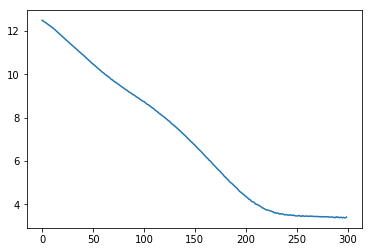

In [117]:
plt.plot(range(epochs),losses);

In [122]:
with torch.no_grad():
    
    y_eval = model.forward(cat_test,con_test)
    
    loss = torch.sqrt(criterion(y_eval,y_test))

In [123]:
loss

tensor(3.3059)

In [127]:
for i in range(30):
    diff = np.abs(y_eval[i].item() - y_test[i].item())
    print(f'{i}.) Predicted: {y_eval[i].item():8.2f}    True_value: {y_test[i].item():8.2f}  Diff: {diff:8.2f}')

0.) Predicted:     4.76    True_value:     2.90  Diff:     1.86
1.) Predicted:    24.88    True_value:     5.70  Diff:    19.18
2.) Predicted:     5.73    True_value:     7.70  Diff:     1.97
3.) Predicted:    12.90    True_value:    12.50  Diff:     0.40
4.) Predicted:     5.23    True_value:     4.10  Diff:     1.13
5.) Predicted:     5.67    True_value:     5.30  Diff:     0.37
6.) Predicted:     4.91    True_value:     3.70  Diff:     1.21
7.) Predicted:    15.69    True_value:    14.50  Diff:     1.19
8.) Predicted:     6.08    True_value:     5.70  Diff:     0.38
9.) Predicted:    11.53    True_value:    10.10  Diff:     1.43
10.) Predicted:     4.14    True_value:     4.50  Diff:     0.36
11.) Predicted:     6.59    True_value:     6.10  Diff:     0.49
12.) Predicted:     7.87    True_value:     6.90  Diff:     0.97
13.) Predicted:    12.59    True_value:    14.10  Diff:     1.51
14.) Predicted:     4.51    True_value:     4.50  Diff:     0.01
15.) Predicted:    28.90    True_va

In [128]:
torch.save(model.state_dict(),'TaxiModel.pt')